In [12]:
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
%matplotlib inline
import sys
import os
import os.path
import subprocess
import numpy as np

import tables as tb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import ZScaleInterval
from matplotlib import pyplot as plt
from hetdex_api.shot import *

In [14]:
shotlist = {}
__ = """20191203_0000024
20191221_0000022
20191203_0000025
20191222_0000023
20191221_0000023
20191224_0000024
20191222_0000024
20191229_0000023
20191231_0000024
20200101_0000019
20191231_0000025
20200101_0000020"""
shotlist["gama09E"] = __.split()

# new
shotlist = {}
__ = """20191203-0000024
20191221-0000022
20191203-0000025
20191222-0000023
20210204-0000016
20191221-0000023
20191224-0000024
20191222-0000024
20191229-0000023
20210208-0000015
20191231-0000024
20200101-0000019
20191231-0000025
20200101-0000020
20210113-0000021"""
shotlist["gama09Efin"] = __.split()

__ = """20200118_0000017
20200215_0000016
20200119_0000018
20200217_0000014
20200124_0000016
20200217_0000015
20200119_0000019
20200225_0000016
20200125_0000020
20200315_0000012
20200126_0000020"""
shotlist["gama09F"] = __.split()

# new
__ = """20200118-0000017
20200215-0000016
20200119-0000018
20200217-0000014
20210205-0000016
20200124-0000016
20200217-0000015
20200119-0000019
20200225-0000016
20200125-0000020
20200315-0000012
20200126-0000020
20201217-0000019
20210114-0000016"""
shotlist["gama09Ffin"] = __.split()

__ = """
20200126-0000021
20201113-0000027
20200127-0000018
20201113-0000028
20210207-0000014
20200127-0000019
20201115-0000023
20200129-0000018
20201116-0000030
20200213-0000015
20201217-0000020
20200129-0000019
20201219-0000020
20210116-0000019"""
shotlist["gama09Gfin"] = __.split()

__ = """
20201212-0000026
20201220-0000024
20201214-0000019
20201222-0000022
20210208-0000014
20201214-0000019
20201222-0000022
20201215-0000020
20210107-0000021
20201216-0000023
20210108-0000021
20201216-0000024
20201219-0000022
20210115-0000016"""
shotlist["gama09Hfin"] = __.split()

colors = {"gama09Efin" : "red", "gama09Ffin" : "green", "gama09Gfin" : "blue", "gama09Hfin" : "magenta"}

In [15]:
field = "gama09Efin"

basepath = "/home/idies/workspace/Storage/mxhf/persistent/mygama09/gama_recon/"
file = '{}.h5'.format(shotlist["gama09Hfin"][-1].replace("-","_"))
fileh = tb.open_file(os.path.join(basepath, file) )


In [16]:
fileh.root.Info

/Info (Table(92736,)) 'Fiber Information'
  description := {
  "amp": StringCol(itemsize=2, shape=(), dflt=b'', pos=0),
  "dec": Float32Col(shape=(), dflt=0.0, pos=1),
  "exp": Int32Col(shape=(), dflt=0, pos=2),
  "ifuid": Int32Col(shape=(), dflt=0, pos=3),
  "ifuslot": Int32Col(shape=(), dflt=0, pos=4),
  "ifux": Float32Col(shape=(), dflt=0.0, pos=5),
  "ifuy": Float32Col(shape=(), dflt=0.0, pos=6),
  "ra": Float32Col(shape=(), dflt=0.0, pos=7),
  "specid": Int32Col(shape=(), dflt=0, pos=8)}
  byteorder := 'little'
  chunkshape := (1927,)

In [17]:
fileh.root.CatSpectra

/CatSpectra (Table(409,)) 'Spectral Extraction Information'
  description := {
  "dec": Float32Col(shape=(), dflt=0.0, pos=0),
  "error": Float32Col(shape=(1036,), dflt=0.0, pos=1),
  "gmag": Float32Col(shape=(), dflt=0.0, pos=2),
  "imag": Float32Col(shape=(), dflt=0.0, pos=3),
  "ra": Float32Col(shape=(), dflt=0.0, pos=4),
  "rmag": Float32Col(shape=(), dflt=0.0, pos=5),
  "spectrum": Float32Col(shape=(1036,), dflt=0.0, pos=6),
  "weight": Float32Col(shape=(1036,), dflt=0.0, pos=7),
  "ymag": Float32Col(shape=(), dflt=0.0, pos=8),
  "zmag": Float32Col(shape=(), dflt=0.0, pos=9)}
  byteorder := 'little'
  chunkshape := (21,)

In [18]:
fibers = fileh.root.Fibers
info   = fileh.root.Info

In [19]:
t = Table(fileh.root.Info.read())

In [20]:
uifuslots = np.unique( t["ifuslot"] ).tolist()
print(uifuslots)

[13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 57, 58, 61, 62, 63, 67, 68, 71, 72, 73, 74, 75, 76, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 106]


In [21]:
region_string="""# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
"""

polygon_template = "polygon({},{},{},{},{},{},{},{}) # color={} font=\"helvetica 6 normal roman\" text={{{}}}\n"

(129.90615205891925, 130.2219607340495, 2.1806188953717554, 2.505667792479197)

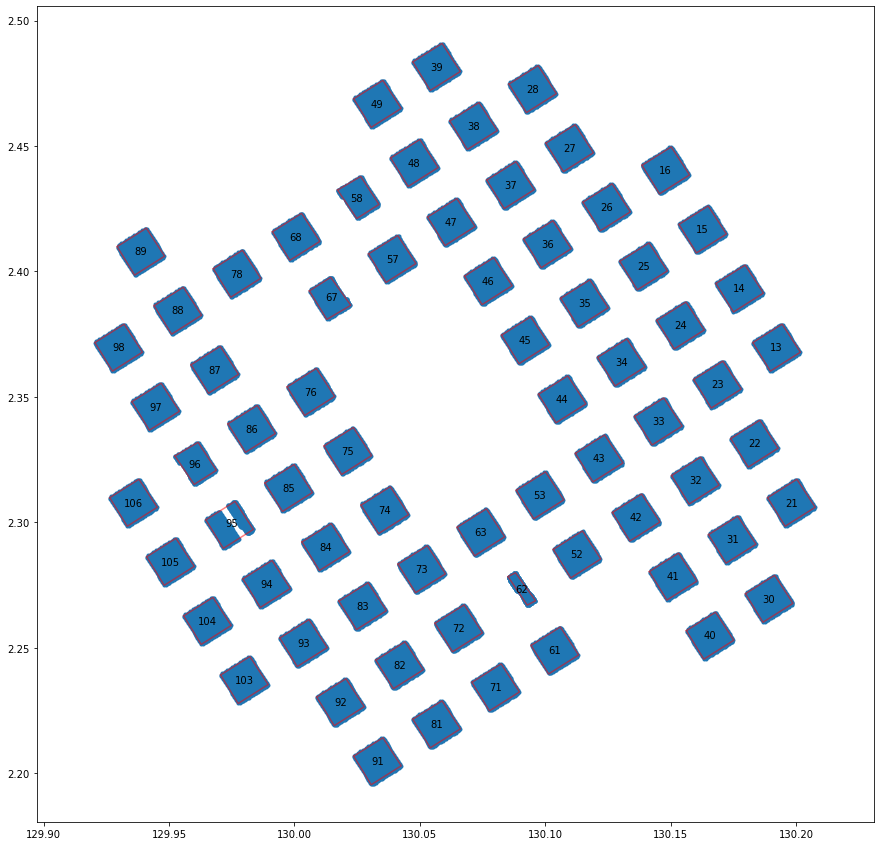

In [22]:
f = plt.figure(figsize=[15,15])
ax = plt.axes()
ax.plot(t["ra"], t["dec"], '.')

hf = 1.5/2./3600. # half fiber

color=colors[field]

for slot in uifuslots:
    jj =  t["ifuslot"] == slot
    i = np.argmin(t["ra"][jj])
    j = np.argmax(t["ra"][jj])

    k = np.argmin(t["dec"][jj])
    l = np.argmax(t["dec"][jj])

    ramin_point = t["ra"][jj][i]-hf, t["dec"][jj][i]
    ramax_point = t["ra"][jj][j]+hf, t["dec"][jj][j]
    decmin_point = t["ra"][jj][k], t["dec"][jj][k]-hf
    decmax_point = t["ra"][jj][l], t["dec"][jj][l]+hf
    
    pp = np.array([ramin_point, decmin_point, ramax_point, decmax_point, ramin_point])
    xx,yy = pp[:,0], pp[:,1]

    plt.plot(xx,yy,'-', color=color, alpha=.5)

    ifura, ifudec = np.mean(t["ra"][jj]), np.mean(t["dec"][jj])
    plt.text(ifura, ifudec, slot, ha='center', va='center')
    
    label = "{}-{}".format(file.replace(".h5",""), slot)
    region_string += polygon_template.format(ramin_point[0], ramin_point[1], decmin_point[0], decmin_point[1], \
                                            ramax_point[0], ramax_point[1],decmax_point[0], decmax_point[1], color, label)

    
plt.axis("equal")

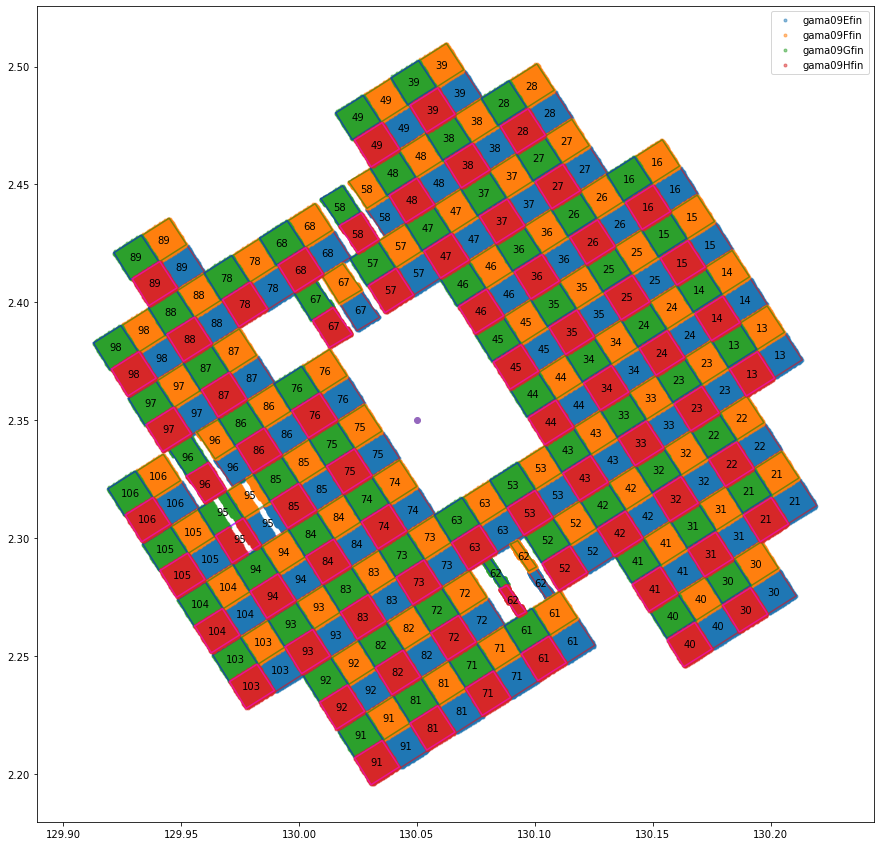

In [35]:

fields = ["gama09Gfin", "gama09Hfin"]
fields = ["gama09Efin", "gama09Ffin", "gama09Gfin", "gama09Hfin"]

f = plt.figure(figsize=[15,15])
ax = plt.axes()

s = "#? rerun      filter    ra       dec       sw     sh  # column descriptor\n"

for field in fields:
    
    basepath = "/home/idies/workspace/Storage/mxhf/persistent/mygama09/gama_recon/"
    file = '{}.h5'.format(shotlist[field][-1].replace("-","_"))
    fileh = tb.open_file(os.path.join(basepath, file) )

    t = Table(fileh.root.Info.read())
    ax.plot(t["ra"], t["dec"], '.', label=field, alpha=.5)

    hf = 1.5/2./3600. # half fiber

    color=colors[field]

    for slot in uifuslots:
        jj =  t["ifuslot"] == slot
        i = np.argmin(t["ra"][jj])
        j = np.argmax(t["ra"][jj])

        k = np.argmin(t["dec"][jj])
        l = np.argmax(t["dec"][jj])

        ramin_point = t["ra"][jj][i]-hf, t["dec"][jj][i]
        ramax_point = t["ra"][jj][j]+hf, t["dec"][jj][j]
        decmin_point = t["ra"][jj][k], t["dec"][jj][k]-hf
        decmax_point = t["ra"][jj][l], t["dec"][jj][l]+hf

        pp = np.array([ramin_point, decmin_point, ramax_point, decmax_point, ramin_point])
        xx,yy = pp[:,0], pp[:,1]

        plt.plot(xx,yy,'-', color=color, alpha=.5)

        ifura, ifudec = np.mean(t["ra"][jj]), np.mean(t["dec"][jj])
        plt.text(ifura, ifudec, slot, ha='center', va='center')

        label = "{}-{}".format(file.replace(".h5",""), slot)
        s += \
"""
pdr2_wide  HSC-G  {ra}  {dec}  160asec  160asec #
pdr2_wide  HSC-R  {ra}  {dec}  160asec  160asec #
pdr2_wide  HSC-I  {ra}  {dec}  160asec  160asec # list of coordinates
pdr2_wide  HSC-Z  {ra}  {dec}  160asec  160asec #
pdr2_wide  HSC-Y  {ra}  {dec}  160asec  160asec #""".format(ra=ifura, dec=ifudec)
        
plt.legend()
plt.axis("equal")

plt.plot([130.05],[2.35 ],'o')

In [18]:
with open("../hsclist_gama09GH.txt", 'w') as f:
    f.write(s)

In [20]:
!cat ../hsclist_gama09GH.txt | wc

    691    5254   55149
